In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# load csv's
keywords_df = pd.read_csv('datasets/keywords.csv')
credits_df = pd.read_csv("datasets/credits.csv")[['id','cast']]
movies_df = pd.read_csv("datasets/movies_metadata.csv")

C:\Users\rsmidtslund\AppData\Local\Temp\ipykernel_13496\2228184926.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("datasets/movies_metadata.csv")


In [4]:
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [5]:
credits_df.head()

,id,cast
0,862,"[{'cast_id': 14, 'character': 'Woody (voice)',..."
1,8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '..."
2,15602,"[{'cast_id': 2, 'character': 'Max Goldman', 'c..."
3,31357,"[{'cast_id': 1, 'character': ""Savannah 'Vannah..."
4,11862,"[{'cast_id': 1, 'character': 'George Banks', '..."


In [6]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
## remove movies with no numeric id and convert id to int
movies_df = movies_df[movies_df['id'].str.isnumeric()]
movies_df['id'] = movies_df['id'].astype(int)

In [8]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [9]:
## filter columns and create a copy of the title
movies_df = movies_df[['id','original_title','overview','genres','release_date','revenue','runtime','original_language', 'vote_count', 'vote_average']]
movies_df['title'] = movies_df['original_title'].copy()

In [10]:
## let's start creating tags column

## merge movies, keywords and credits
df = pd.merge(movies_df, keywords_df, on='id', how='left')
df = pd.merge(df, credits_df, on='id', how='left')
df.reset_index(inplace=True, drop=True)

df.head()

,id,original_title,overview,genres,release_date,revenue,runtime,original_language,vote_count,vote_average,title,keywords,cast
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,373554033.0,81.0,en,5415.0,7.7,Toy Story,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,262797249.0,104.0,en,2413.0,6.9,Jumanji,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '..."
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,0.0,101.0,en,92.0,6.5,Grumpier Old Men,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c..."
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,81452156.0,127.0,en,34.0,6.1,Waiting to Exhale,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,76578911.0,106.0,en,173.0,5.7,Father of the Bride Part II,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '..."


In [11]:
## transform and create release year column

df['release_year'] = df['release_date'].fillna(-1)
df['release_year'] = df['release_year'].apply(lambda x: pd.to_datetime(x, errors='coerce').year)

## transform genres to a string

df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in eval(x)])
df['genres'] = df['genres'].apply(lambda x: ' '.join([i.replace(" ","") for i in x]))

## transform titles

df['original_title'] = df['original_title'].apply(lambda x: x.replace(" ", ""))

## transform keywords

df['keywords'].fillna('[]', inplace=True)
df['keywords'] = df['keywords'].apply(lambda x: [i['name'] for i in eval(x)])
df['keywords'] = df['keywords'].apply(lambda x: ' '.join([i.replace(" ",'') for i in x]))

## transform cast

df['cast'].fillna('[]', inplace=True)
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in eval(x)])
df['cast'] = df['cast'].apply(lambda x: ' '.join([i.replace(" ",'') for i in x]))

## create tags by combining
df['tags'] = df['genres'] +  ' ' + df['original_title'] + ' ' + df['keywords'] + ' ' + df['cast']

## drop columns, empty rows and duplicates
df=df[["id", "title", "release_year", "overview", "tags"]]
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

C:\Users\rsmidtslund\AppData\Local\Temp\ipykernel_13496\687459884.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['keywords'].fillna('[]', inplace=True)
C:\Users\rsmidtslund\AppData\Local\Temp\ipykernel_13496\687459884.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

<Axes: >

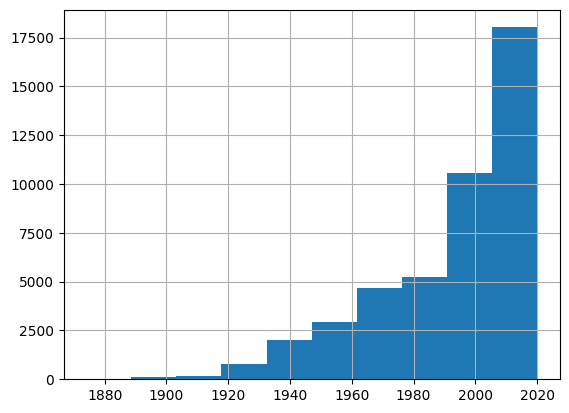

In [12]:
df['release_year'].hist()

In [13]:
## change id to movie_id
df.rename(columns={'id':'movie_id'}, inplace=True)

In [14]:
df.head()

,movie_id,title,release_year,overview,tags
0,862,Toy Story,1995,"Led by Woody, Andy's toys live happily in his ...",Animation Comedy Family ToyStory jealousy toy ...
1,8844,Jumanji,1995,When siblings Judy and Peter discover an encha...,Adventure Fantasy Family Jumanji boardgame dis...
2,15602,Grumpier Old Men,1995,A family wedding reignites the ancient feud be...,Romance Comedy GrumpierOldMen fishing bestfrie...
3,31357,Waiting to Exhale,1995,"Cheated on, mistreated and stepped on, the wom...",Comedy Drama Romance WaitingtoExhale basedonno...
4,11862,Father of the Bride Part II,1995,Just when George Banks has recovered from his ...,Comedy FatheroftheBridePartII baby midlifecris...


In [15]:
import os

# Create the directory if it doesn't exist
os.makedirs('data_model', exist_ok=True)

# Save the users_df as a CSV file in the data_model directory
df.to_csv('data_model/movies_tags.csv', index=False)